In [ ]:
#Imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import numpy as np
from pandas.api.types import is_string_dtype
import os
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler,Normalizer,FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import warnings
from sklearn.svm import SVR
import statsmodels.api as sm

In [6]:
data=pd.read_csv('Final_Clean_EDNYC.csv')

/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1552/1192189947.py:1: DtypeWarning: Columns (2,11,12,13,14,15,16,17,18,20,23,24,25,26,28,57,58,59,60,61,62,63,64,68) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('Final_Clean_EDNYC.csv')


In [7]:
multifam=data[data['largest_property_use_type']=='Multifamily Housing']
college=data[data['largest_property_use_type']=='College/University']
office=data[data['largest_property_use_type']=='Office']
d_center=data[data['largest_property_use_type']=='Distribution Center']
hotel=data[data['largest_property_use_type']=='Hotel']
other=data[data['largest_property_use_type']=='Other']
rec=data[data['largest_property_use_type']=='Recreation']
dorm=data[data['largest_property_use_type']=='Residence Hall/Dormitory']
sen_care=data[data['largest_property_use_type']=='Senior Care Community']
retail=data[data['largest_property_use_type']=='Retail Store']

In [8]:
# Select the numeric columns
numeric_subset = multifam.select_dtypes('number')

# # Create columns with square root and log of numeric columns
# for col in numeric_subset.columns:
#     # Skip the Energy Star Score column
#     if col == 'score':
#         next
#     else:
#         numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
#         numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = multifam[['borough']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

In [9]:
# fill in nan with mean
for i in features.columns:
    mean_value=features[i].mean()
    features[i].fillna(value=mean_value, inplace=True)

In [10]:
sc=StandardScaler()
standard=features.copy()
sub=standard.select_dtypes(include=[np.number])
standard[sub.columns[1:51]]=sc.fit_transform(standard[sub.columns[1:51]])
standard.head()

,Unnamed: 0,score,site_eui_kbtu_ft,site_energy_use_kbtu,source_eui_kbtu_ft,source_energy_use_kbtu,natural_gas_use_kbtu,green_power_offsite_kwh,largest_property_use_type_1,weather_normalized_site_eui,...,multifamily_housing_number_6,multifamily_housing_number_7,property_gfa_self_reported,property_gfa_calculated,property_gfa_calculated_1,borough_BRONX,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN IS
41,48,0.659436,-1.146811,0.757139,-0.138632,1.853301,-0.210778,-0.006275,5.871701e-17,-2.608427e-14,...,-4.070083e-16,-1.458745e-15,0.0,-5.947607e-17,0.0,-0.537887,-0.568438,1.409853,-0.428807,-0.094995
63,70,0.431826,-0.127552,1.892033,0.055843,2.460704,1.514698,-0.006275,5.871701e-17,-2.608427e-14,...,-4.070083e-16,-1.458745e-15,0.0,-5.947607e-17,0.0,-0.537887,-0.568438,1.409853,-0.428807,-0.094995
1078,1088,0.496857,-0.483246,1.163875,-0.004511,1.807899,-0.188161,-0.006275,5.871701e-17,-2.608427e-14,...,-4.070083e-16,-1.458745e-15,0.0,-5.947607e-17,0.0,-0.537887,-0.568438,-0.709294,-0.428807,-0.094995
1085,1095,-1.291506,0.661552,1.206991,0.961157,1.565835,0.980575,-0.006275,5.871701e-17,-2.608427e-14,...,-4.070083e-16,-1.458745e-15,0.0,-5.947607e-17,0.0,-0.537887,-0.568438,1.409853,-0.428807,-0.094995
1086,1096,-1.324022,0.670520,0.691988,0.764447,0.833751,0.625417,-0.006275,5.871701e-17,-2.608427e-14,...,-4.070083e-16,-1.458745e-15,0.0,-5.947607e-17,0.0,-0.537887,-0.568438,-0.709294,-0.428807,-0.094995


In [11]:
sc=Normalizer()
normalized=features.copy()
sub=normalized.select_dtypes(include=[np.number])
normalized[sub.columns[1:51]]=sc.fit_transform(standard[sub.columns[1:51]])
normalized.head()

,Unnamed: 0,score,site_eui_kbtu_ft,site_energy_use_kbtu,source_eui_kbtu_ft,source_energy_use_kbtu,natural_gas_use_kbtu,green_power_offsite_kwh,largest_property_use_type_1,weather_normalized_site_eui,...,multifamily_housing_number_6,multifamily_housing_number_7,property_gfa_self_reported,property_gfa_calculated,property_gfa_calculated_1,borough_BRONX,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN IS
41,48,0.224673,-0.390725,0.257961,-0.047233,0.631430,-0.071813,-0.002138,2.000521e-17,-8.887055e-15,...,-1.386700e-16,-4.970024e-16,0.0,-2.026382e-17,0.0,-0.183261,-0.193670,0.480345,-0.146097,-0.032365
63,70,0.111765,-0.033013,0.489696,0.014453,0.636879,0.392034,-0.001624,1.519713e-17,-6.751130e-15,...,-1.053419e-16,-3.775523e-16,0.0,-1.539359e-17,0.0,-0.139216,-0.147123,0.364898,-0.110984,-0.024586
1078,1088,0.195677,-0.190316,0.458368,-0.001777,0.712003,-0.074103,-0.002471,2.312445e-17,-1.027274e-14,...,-1.602916e-16,-5.744958e-16,0.0,-2.342339e-17,0.0,-0.211836,-0.223867,-0.279340,-0.168876,-0.037412
1085,1095,-0.394959,0.202311,0.369113,0.293934,0.478852,0.299872,-0.001919,1.795642e-17,-7.976906e-15,...,-1.244684e-16,-4.461030e-16,0.0,-1.818855e-17,0.0,-0.164493,-0.173836,0.431151,-0.131135,-0.029051
1086,1096,-0.556497,0.281825,0.290848,0.321303,0.350432,0.262868,-0.002637,2.467924e-17,-1.096343e-14,...,-1.710689e-16,-6.131223e-16,0.0,-2.499827e-17,0.0,-0.226078,-0.238919,-0.298122,-0.180231,-0.039927


In [12]:
X=features.drop('score', axis=1)
y=features['score']
X_n=normalized.drop('score', axis=1)
y_n=normalized['score']
X_r=standard.drop('score', axis=1)
y_r=standard['score']

In [13]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(54816, 44)
(13704, 44)
(17131, 44)
(54816,)
(13704,)
(17131,)


In [14]:
# Split into 80% training and 20% testing set
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size = 0.2, random_state = 42)
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_r, y_train_r, test_size=0.20, random_state=1)


In [15]:
# Split into 80% training and 20% testing set
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size = 0.2, random_state = 42)
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(X_train_n, y_train_n, test_size=0.20, random_state=1)


In [16]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

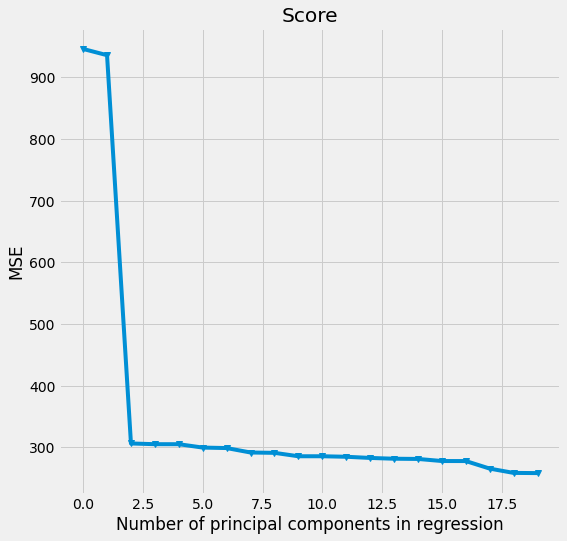

In [133]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [134]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 39.24,  52.74,  60.03,  65.41,  69.98,  73.16,  76.12,  78.89,
        81.39,  83.75,  86.07,  88.14,  89.8 ,  91.17,  92.41,  93.61,
        94.73,  95.72,  96.6 ,  97.23,  97.79,  98.21,  98.61,  99.  ,
        99.28,  99.47,  99.6 ,  99.7 ,  99.77,  99.83,  99.88,  99.92,
        99.95,  99.97,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  ])

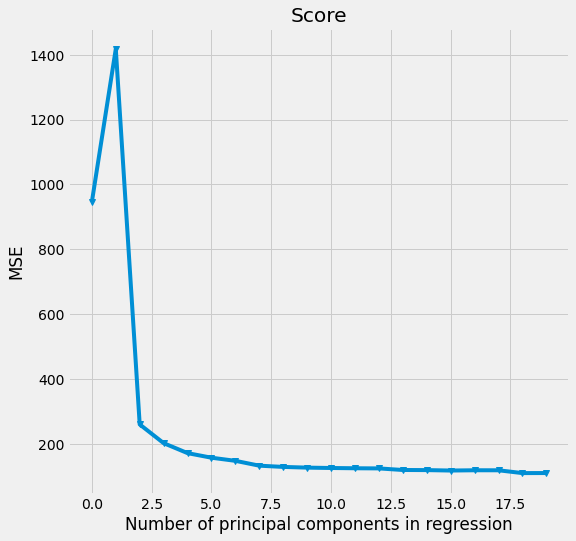

In [135]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = DecisionTreeRegressor()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [18]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = GradientBoostingRegressor()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

KeyboardInterrupt: 

In [ ]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = SVR()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [ ]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = RandomForestRegressor()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [17]:
pca2 = PCA()



# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

NameError: name 'regr' is not defined

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA()
pca.fit(X_train_sc)
# show the results
pca.components_
pca.explained_variance_
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_) 

array([0.14344059, 0.26250198, 0.36349586, 0.45633094, 0.54185459,
       0.61874203, 0.69175345, 0.75490083, 0.81694581, 0.86881166,
       0.90683268, 0.93350739, 0.958566  , 0.98259236, 0.99725608,
       1.        ])

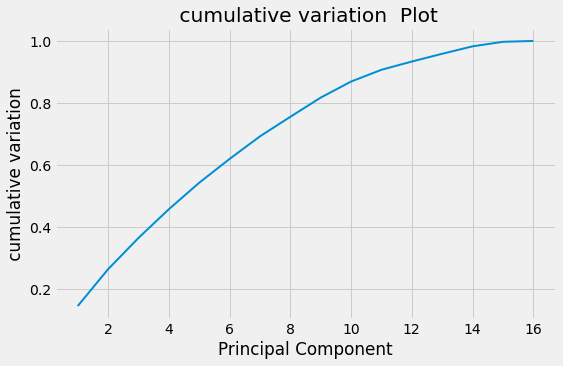

In [ ]:
# generate the Scree plot for PCs
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(16) + 1
plt.plot(sing_vals, np.cumsum(pca.explained_variance_ratio_), linewidth=2)
plt.title(' cumulative variation  Plot')
plt.xlabel('Principal Component')
plt.ylabel(' cumulative variation ')
plt.show()

In [ ]:
principal_Df = pd.DataFrame(data = X_train_pca
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principal_Df.tail()

,principal component 1,principal component 2
54811,0.869627,-0.284183
54812,-0.441225,-0.376926
54813,-1.191270,-0.313020
54814,-2.535587,1.336062
54815,-1.750850,0.154097


In [ ]:
print('Explained variation per principal component: {}'.format(explained_variance))

Explained variation per principal component: [0.14344059 0.1190606 ]


In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
history = NN_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/200
1370/1371 [============================>.] - ETA: 0s - loss: 348.6354 - mean_squared_error: 20217294.0000
Epoch 1: val_loss improved from inf to 154.93478, saving model to Weights-001--154.93478.hdf5
1371/1371 [==============================] - 43s 30ms/step - loss: 348.5920 - mean_squared_error: 20211774.0000 - val_loss: 154.9348 - val_mean_squared_error: 110179.7031
Epoch 2/200
1371/1371 [==============================] - ETA: 0s - loss: 54.9928 - mean_squared_error: 27641.3945
Epoch 2: val_loss improved from 154.93478 to 45.84657, saving model to Weights-002--45.84657.hdf5
1371/1371 [==============================] - 36s 26ms/step - loss: 54.9928 - mean_squared_error: 27641.3945 - val_loss: 45.8466 - val_mean_squared_error: 4763.8535
Epoch 3/200
1369/1371 [============================>.] - ETA: 0s - loss: 46.2291 - mean_squared_error: 8355.4492
Epoch 3: val_loss improved from 45.84657 to 43.50563, saving model to Weights-003--43.50563.hdf5
1371/1371 [====================

KeyboardInterrupt: 

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
weights_file = 'Weights-005--37.41953.hdf5'
NN_model.load_weights(weights_file)
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
predictions = NN_model.predict(X_test)
list(zip(y_test, predictions))

# Find model by borough

In [ ]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

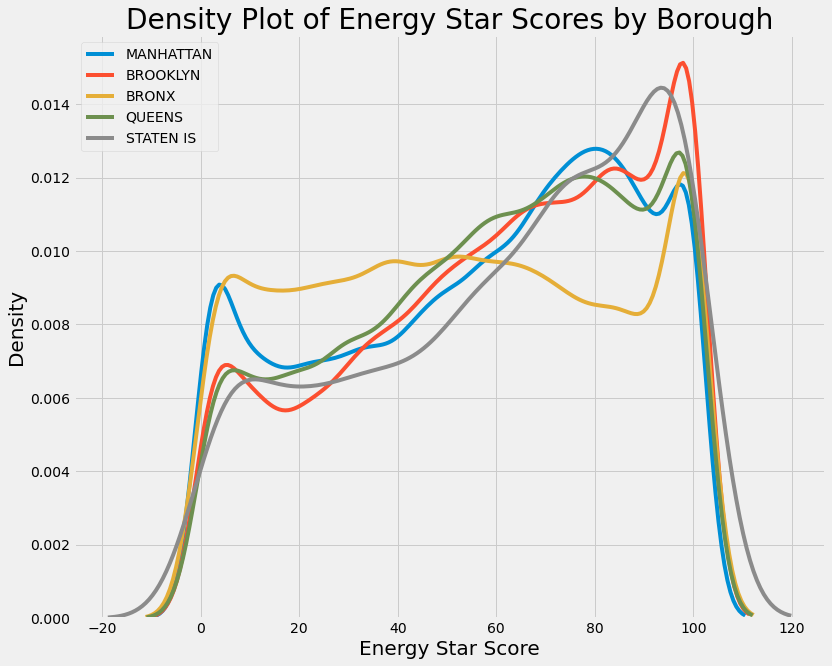

In [ ]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);
plt.legend()

In [ ]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

difference_from_national_1       -0.867565
difference_from_national         -0.867565
site_eui_kbtu_ft                 -0.744379
weather_normalized_site_eui      -0.737747
source_eui_kbtu_ft               -0.657722
weather_normalized_source        -0.655852
direct_ghg_emissions_metric      -0.086572
site_energy_use_kbtu             -0.083690
natural_gas_use_kbtu             -0.079277
net_emissions_metric_tons        -0.079162
total_ghg_emissions_metric       -0.079120
weather_normalized_site_energy   -0.078859
weather_normalized_site_2        -0.077353
latitude                         -0.071888
source_energy_use_kbtu           -0.071215
Name: score, dtype: float64 

percent_of_electricity_that     0.011597
weather_normalized_site_1       0.014754
property_gfa_self_reported      0.026841
largest_property_use_type_1     0.028841
property_gfa_calculated         0.032398
property_gfa_calculated_1       0.033528
egrid_output_emissions_rate     0.035328
community_board                 0.0433

In [ ]:
#identify and drop highly correlated variable
cor_matrix = data.drop('score',axis=1).corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]

<ipython-input-146-c3732233f365>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [ ]:
correlated_features = set()
correlation_matrix = data.drop('score',axis=1).corr()
threshold = 0.90

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
len(to_drop)

20

In [ ]:
print(correlated_features)

{'property_gfa_calculated_1', 'property_gfa_calculated', 'source_energy_use_kbtu', 'weather_normalized_source', 'net_emissions_metric_tons', 'weather_normalized_source_1', 'weather_normalized_site_eui', 'multifamily_housing_gross', 'electricity_use_grid_purchase', 'multifamily_housing_number', 'indirect_ghg_emissions_metric', 'national_median_total_ghg', 'weather_normalized_site_energy', 'multifamily_housing_number_7', 'property_gfa_self_reported', 'direct_ghg_emissions_metric', 'total_ghg_emissions_metric', 'weather_normalized_site_3', 'difference_from_national_1', 'weather_normalized_site_2'}


In [ ]:
to_drop

['source_energy_use_kbtu',
 'weather_normalized_site_eui',
 'weather_normalized_site_energy',
 'weather_normalized_source',
 'difference_from_national_1',
 'weather_normalized_source_1',
 'weather_normalized_site_2',
 'electricity_use_grid_purchase',
 'weather_normalized_site_3',
 'total_ghg_emissions_metric',
 'direct_ghg_emissions_metric',
 'indirect_ghg_emissions_metric',
 'net_emissions_metric_tons',
 'national_median_total_ghg',
 'multifamily_housing_gross',
 'multifamily_housing_number',
 'multifamily_housing_number_7',
 'property_gfa_self_reported',
 'property_gfa_calculated',
 'property_gfa_calculated_1']

In [ ]:
to_drop.remove('total_ghg_emissions_metric')
correlated_features.remove('total_ghg_emissions_metric')

In [ ]:
data_1=data.drop(correlated_features,axis=1) 

In [ ]:
28797 in data_1['property_id']

True

In [ ]:
# Select the numeric columns
numeric_subset = data_1.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data_1[['borough', 'largest_property_use_type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

<ipython-input-155-1b8ff5f3b498>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
<ipython-input-155-1b8ff5f3b498>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subset['log_' + col] = np.log(numeric_subset[col])
/Users/Lucy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Lucy/opt/anaconda3/lib/python3.8

In [ ]:
# Display most negative correlations
correlations.head(15)

log_difference_from_national     -0.915611
sqrt_difference_from_national    -0.896893
difference_from_national         -0.867565
site_eui_kbtu_ft                 -0.744379
sqrt_site_eui_kbtu_ft            -0.733246
sqrt_source_eui_kbtu_ft          -0.695992
source_eui_kbtu_ft               -0.657722
log_site_eui_kbtu_ft             -0.652872
log_source_eui_kbtu_ft           -0.648491
log_site_energy_use_kbtu         -0.304356
log_total_ghg_emissions_metric   -0.283358
log_weather_normalized_site      -0.247594
log_natural_gas_use_kbtu         -0.243874
sqrt_natural_gas_use_kbtu        -0.217528
sqrt_site_energy_use_kbtu        -0.198203
Name: score, dtype: float64

In [ ]:
# Display most positive correlations
correlations.tail(15)

council_district                                0.056504
national_median_site_eui                        0.064280
sqrt_largest_property_use_type_1                0.070554
largest_property_use_type_College/University    0.073967
multifamily_housing_number_6                    0.091034
largest_property_use_type_Office                0.093206
log_largest_property_use_type_1                 0.105974
log_green_power_offsite_kwh                     0.121338
log_multifamily_housing_number_6                0.151948
log_avoided_emissions_offsite                   0.152570
national_median_source_eui                      0.153506
sqrt_multifamily_housing_number_6               0.160788
sqrt_national_median_source_eui                 0.174985
log_national_median_source_eui                  0.176394
score                                           1.000000
Name: score, dtype: float64

/Users/Lucy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Lucy/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


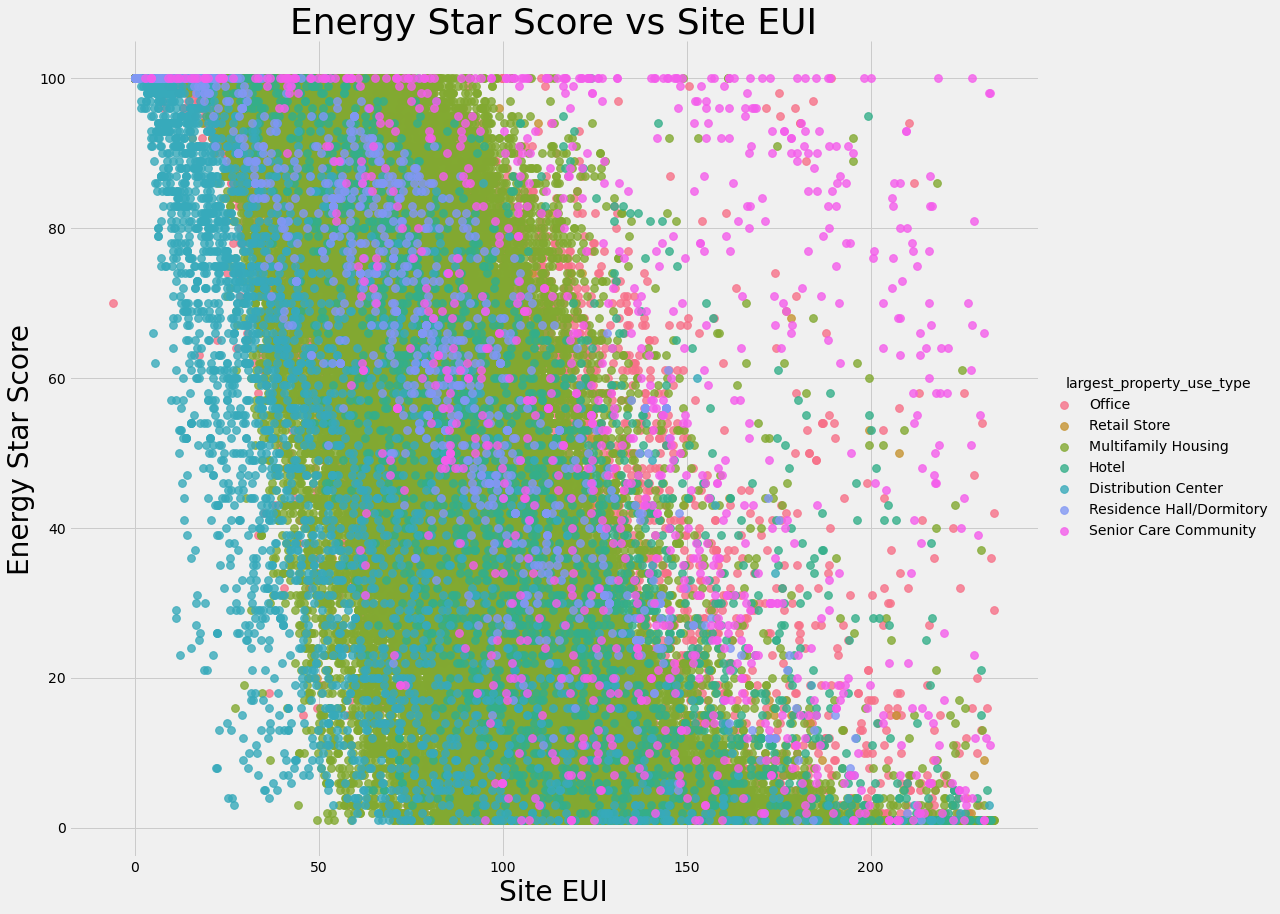

In [ ]:
figsize(12, 10)

# Extract the building types
features['largest_property_use_type'] = data_1.dropna(subset = ['score'])['largest_property_use_type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['largest_property_use_type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('site_eui_kbtu_ft', 'score', 
          hue = 'largest_property_use_type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);


In [ ]:
# Remove any columns with all na values
features_1  = features.dropna(axis=1, how = 'all')
features_1.shape

(127570, 106)

In [ ]:
features_1.columns

Index(['property_id', 'year_built', 'number_of_buildings', 'occupancy',
       'score', 'site_eui_kbtu_ft', 'site_energy_use_kbtu',
       'source_eui_kbtu_ft', 'natural_gas_use_kbtu', 'green_power_offsite_kwh',
       ...
       'largest_property_use_type_Food Service',
       'largest_property_use_type_Hotel',
       'largest_property_use_type_Multifamily Housing',
       'largest_property_use_type_Office', 'largest_property_use_type_Other',
       'largest_property_use_type_Recreation',
       'largest_property_use_type_Residence Hall/Dormitory',
       'largest_property_use_type_Retail Store',
       'largest_property_use_type_Senior Care Community',
       'largest_property_use_type_nan'],
      dtype='object', length=106)

In [ ]:
features_1.drop(['property_id','number_of_buildings','community_board', 'longitude','log_property_id','sqrt_property_id',
 'census_tract','national_median_site_eui','sqrt_number_of_buildings','log_number_of_buildings','sqrt_occupancy','log_occupancy',
'sqrt_community_board', 'log_community_board', 'sqrt_census_tract','log_census_tract', 'sqrt_national_median_site_eui',
       'log_national_median_site_eui'  ], axis=1, inplace=True)


/Users/Lucy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# Extract the buildings with no score and the buildings with a score
no_score = features_1[features_1['score'].isna()]
score = features_1[features_1['score'].notnull()]

print(no_score.shape)
print(score.shape)

(0, 49)
(127570, 49)


In [ ]:
# Separate out the features and targets
features = score.drop(columns=['score'])
targets = score['score']

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127570 entries, 0 to 175781
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   year_built                                          127570 non-null  int64  
 1   occupancy                                           127570 non-null  int64  
 2   site_eui_kbtu_ft                                    127570 non-null  float64
 3   site_energy_use_kbtu                                127570 non-null  float64
 4   green_power_offsite_kwh                             126339 non-null  float64
 5   weather_normalized_site                             101290 non-null  float64
 6   weather_normalized_site_1                           92956 non-null   float64
 7   total_ghg_emissions_metric                          105065 non-null  float64
 8   egrid_output_emissions_rate                         104991 non-n

In [ ]:
# Delete columns containing either 75% or more than 75% NaN Values
perc = 30.0
min_count =  int(((100-perc)/100)*features.shape[0] + 1)
features = features.dropna( axis=1, thresh=min_count)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127570 entries, 0 to 175781
Data columns (total 42 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   year_built                                          127570 non-null  int64  
 1   occupancy                                           127570 non-null  int64  
 2   site_eui_kbtu_ft                                    127570 non-null  float64
 3   site_energy_use_kbtu                                127570 non-null  float64
 4   green_power_offsite_kwh                             126339 non-null  float64
 5   weather_normalized_site                             101290 non-null  float64
 6   weather_normalized_site_1                           92956 non-null   float64
 7   total_ghg_emissions_metric                          105065 non-null  float64
 8   egrid_output_emissions_rate                         104991 non-n

In [ ]:
# fill in nan with mean
for i in features.columns:
    mean_value=features[i].mean()
    features[i].fillna(value=mean_value, inplace=True)

In [ ]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(81644, 42)
(20412, 42)
(25514, 42)
(81644,)
(20412,)
(25514,)


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127570 entries, 0 to 175781
Data columns (total 42 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   year_built                                          127570 non-null  int64  
 1   occupancy                                           127570 non-null  int64  
 2   site_eui_kbtu_ft                                    127570 non-null  float64
 3   site_energy_use_kbtu                                127570 non-null  float64
 4   green_power_offsite_kwh                             127570 non-null  float64
 5   weather_normalized_site                             127570 non-null  float64
 6   weather_normalized_site_1                           127570 non-null  float64
 7   total_ghg_emissions_metric                          127570 non-null  float64
 8   egrid_output_emissions_rate                         127570 non-n

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 60.00
Baseline Performance on the test set: MAE = 25.9070


In [ ]:
# fit the regressor with val data
regressor = DecisionTreeRegressor() 
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
y_val_pred = regressor.predict(X_val)
#fit test on extracted features 

print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
#print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))

print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
#print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))


MSE train: 0.164, val: 353.978
R^2 train: 1.000, val: 0.614


In [ ]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)[:6]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(5, 7))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")


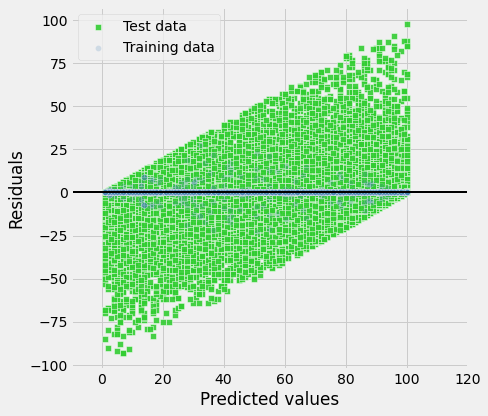

In [ ]:
fig = plt.figure(figsize=(7, 6))

plt.scatter(y_val_pred,  
            y_val_pred - y_val, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.2,
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
plt.xlim([-10, 120])
plt.tight_layout()

#plt.savefig('GBR.png', dpi=300)
plt.show()    

In [ ]:
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_train_pred=reg.predict(X_train)
y_val_pred=reg.predict(X_val)
#test
#y_test_pred=reg.predict(X_test)

print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
#print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))

print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))

MSE train: 215.851, val: 222.729
R^2 train: 0.763, val: 0.757


In [ ]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)[:6]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(5, 7))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")


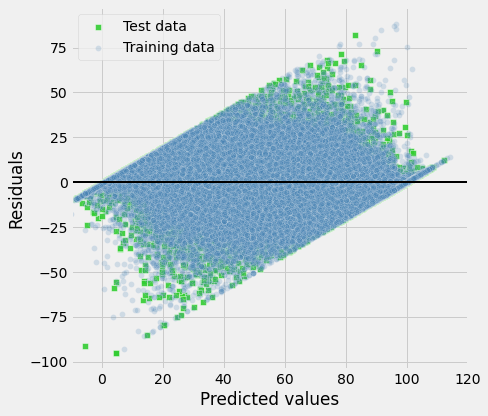

In [ ]:
fig = plt.figure(figsize=(7, 6))

plt.scatter(y_val_pred,  
            y_val_pred - y_val, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.2,
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
plt.xlim([-10, 120])
plt.tight_layout()

#plt.savefig('GBR.png', dpi=300)
plt.show()    